# Energy Dataset

### The dataset contains the energy types that are consumed and produced of all the countries from 1900 to 2020. 

#### How to download the dataset: 
#### Head to this page: https://github.com/owid/energy-data, the download csv section is in the readme section of the page.


### The questions I would like to answer are:

### 1. Which major power is still very dependendent on coal?


### 2. Which major power is consuming the most renewable energy per capita?

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
energy = pd.read_csv("owid-energy-data.csv")

In [134]:
energy.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17470.000000,7445.000000,10394.000000,4.862000e+03,7893.000000,6521.000000,8565.000000,9840.000000,9892.000000,4639.000000,...,6948.000000,4290.000000,1.045800e+04,5784.000000,1543.000000,4284.000000,4207.000000,4290.000000,6948.000000,4290.000000
mean,1973.194963,20.830774,8.798102,1.921623e+14,14.369018,18.242190,18.033792,4.494566,36.853247,1.518011,...,12.759769,29.375128,5.416925e+11,1.132829,313.478014,0.345406,2.163830,15.080935,46.271472,134.003056
std,34.365711,697.178744,135.503698,1.339910e+16,85.415649,335.492675,169.610587,24.546076,267.425811,3.521276,...,56.391220,127.852638,4.083457e+12,4.020411,6836.857935,1.337962,17.013149,126.674141,200.982055,513.368047
min,1900.000000,-100.000000,-2326.870000,-1.000000e+02,-1054.320000,-100.000000,-2239.737000,-92.632000,-6083.407000,0.000000,...,0.000000,0.000000,1.963080e+08,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-1.532000,0.000000,0.000000e+00,0.000000,-1.429000,0.000000,-0.431250,-0.044000,0.000000,...,0.000000,0.000000,1.254114e+10,0.000000,2.159500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,0.000000,0.000000,2.583500e+00,0.000000,0.278000,0.000000,2.566500,0.735500,0.029000,...,0.000000,0.000000,4.285207e+10,0.000000,19.749000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,7.690000,0.334000,9.703500e+00,2.559000,9.091000,3.222000,6.870500,10.328250,1.329000,...,0.216000,0.295500,1.750000e+11,0.114000,50.000000,0.020000,0.010000,0.141000,0.721500,4.744750
max,2021.000000,44965.754000,3060.593000,9.342930e+17,2112.975000,25500.000000,2790.614000,1487.995000,6446.809000,33.912000,...,824.980000,1763.675000,1.070000e+14,57.658000,242384.843000,20.660000,428.736000,3540.051000,2872.827000,6928.363000


In [135]:
# reset index to year
# energy = energy.set_index(energy['year'])
display(energy.columns.unique())
display(energy.index.unique())

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=124)

RangeIndex(start=0, stop=17470, step=1)

In [93]:
energy.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
for key in energy.columns:
    print(key)

iso_code
country
year
coal_prod_change_pct
coal_prod_change_twh
gas_prod_change_pct
gas_prod_change_twh
oil_prod_change_pct
oil_prod_change_twh
energy_cons_change_pct
energy_cons_change_twh
biofuel_share_elec
biofuel_elec_per_capita
biofuel_cons_change_pct
biofuel_share_energy
biofuel_cons_change_twh
biofuel_consumption
biofuel_cons_per_capita
carbon_intensity_elec
coal_share_elec
coal_cons_change_pct
coal_share_energy
coal_cons_change_twh
coal_consumption
coal_elec_per_capita
coal_cons_per_capita
coal_production
coal_prod_per_capita
biofuel_electricity
coal_electricity
fossil_electricity
gas_electricity
hydro_electricity
nuclear_electricity
oil_electricity
other_renewable_exc_biofuel_electricity
other_renewable_electricity
renewables_electricity
solar_electricity
wind_electricity
electricity_generation
energy_per_gdp
energy_per_capita
fossil_cons_change_pct
fossil_share_energy
fossil_cons_change_twh
fossil_fuel_consumption
fossil_energy_per_capita
fossil_cons_per_capita
fossil_share_e

In [69]:
for key in energy.index:
    print(key)

1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979


In [98]:
ukdf = energy[energy["country"] == "United Kingdom"]
usadf = energy[energy['country']=='United States']
russiadf = energy[energy['country']=='Russia']
germanydf = energy[energy['country']=='Germany']
francedf =  energy[energy['country']=='France']

ukdf = ukdf.set_index("year")
usadf = usadf.set_index("year")
russiadf = russiadf.set_index("year")
germanydf = germanydf.set_index("year")
francedf =  francedf.set_index("year")


In [ ]:
russiadf

,iso_code,country,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
year,,,,,,,,,,,,,,,,,,,,,
1900,RUS,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,RUS,Russia,2.296,2.487,NaN,0.000,11.816,14.212,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,RUS,Russia,-0.369,-0.409,NaN,0.000,-5.016,-6.745,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,RUS,Russia,2.441,2.695,NaN,0.000,-6.127,-7.827,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,RUS,Russia,16.250,18.376,NaN,0.000,4.005,4.803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,RUS,Russia,4.095,88.737,0.827,48.358,2.603,163.781,2.201,172.011,...,3.166,8.107,3.320000e+12,0.015,-0.536,0.005,-0.002,0.372,1.033,2.564
2017,RUS,Russia,6.099,137.583,7.855,462.855,-0.289,-18.640,0.391,31.255,...,3.848,9.345,NaN,0.014,-6.710,0.004,-0.025,0.348,0.962,2.388
2018,RUS,Russia,7.075,169.333,5.279,335.521,1.633,105.095,4.035,323.625,...,4.941,10.650,NaN,0.022,69.621,0.007,0.242,0.589,1.592,4.045


### Simple plot

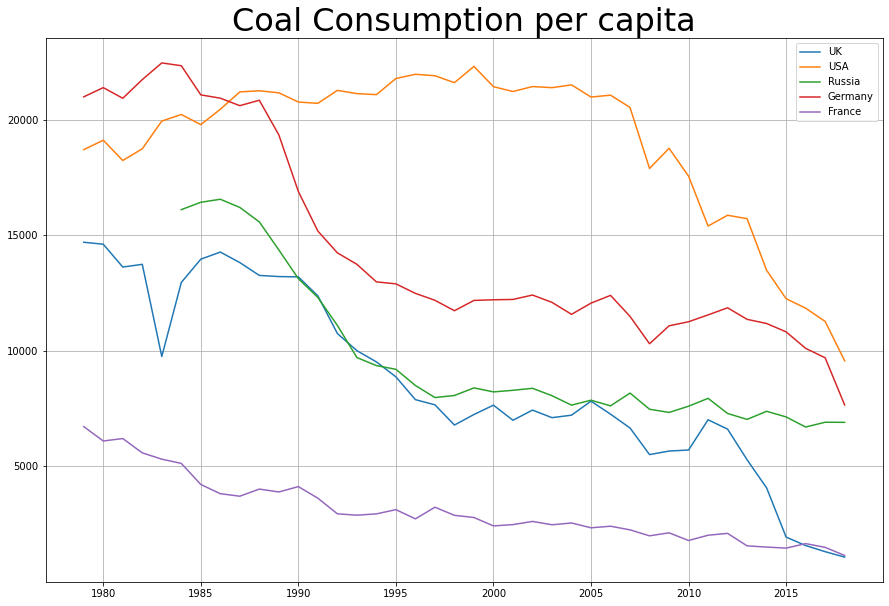

In [131]:
def plot_indicator(df,label):
    plt.plot(range(1979,2020),df.loc[1980:2020]["coal_cons_per_capita"],label=label)
plt.figure(figsize=(15,10))
plot_indicator(ukdf,'UK')
plot_indicator(usadf,'USA')
plot_indicator(russiadf,'Russia')
plot_indicator(germanydf,'Germany')
plot_indicator(francedf,'France')
plt.legend()
plt.title("Coal Consumption per capita",fontsize=32)
plt.grid()
    

### Groupby Analysis


In [130]:
# Binning of the data based on a condition (75% percentile produces 104 gas)
energy.loc[energy.gas_production < 104, 'Gas Producer'] = "No/Low Gas Producer"
energy.loc[energy.gas_production >= 104,'Gas Producer'] = "High Gas Producer"
 
# Grouping and couting
energy.groupby('Gas Producer').count()
# energy_groupby = energy.groupby('coal_prod_per_capita')
# display(energy_groupby.head())
# display(energy)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
Gas Producer,,,,,,,,,,,,,,,,,,,,,
High Gas Producer,1479,2020,2020,1594,1166,2010,1999,1964,1798,1811,...,1471,1427,1322,1358,668,1427,1422,1427,1471,1427
No/Low Gas Producer,5660,6046,6046,3078,4117,2071,5894,3226,5463,2185,...,1304,733,4120,961,130,732,732,733,1304,733


### Pivot Table Analysis

In [ ]:
energy_pivot = energy.pivot(columns = 'country', index = 'year', values = 'renewables_energy_per_capita')

In [ ]:
energy_pivot

country,Afghanistan,Africa,Albania,Algeria,American Samoa,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Sahara,World,Yemen,Yugoslavia,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,303.573,NaN,34.973,NaN,NaN,NaN,2962.672,NaN,NaN,...,NaN,5042.709,2355.057,NaN,NaN,2194.493,NaN,NaN,NaN,NaN
2018,NaN,317.342,NaN,42.965,NaN,NaN,NaN,2962.767,NaN,NaN,...,NaN,4903.819,2210.678,NaN,NaN,2298.676,NaN,NaN,NaN,NaN
2019,NaN,337.336,NaN,44.661,NaN,NaN,NaN,2911.840,NaN,NaN,...,NaN,5507.746,1804.925,NaN,NaN,2398.941,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Renewable Energy per capita')

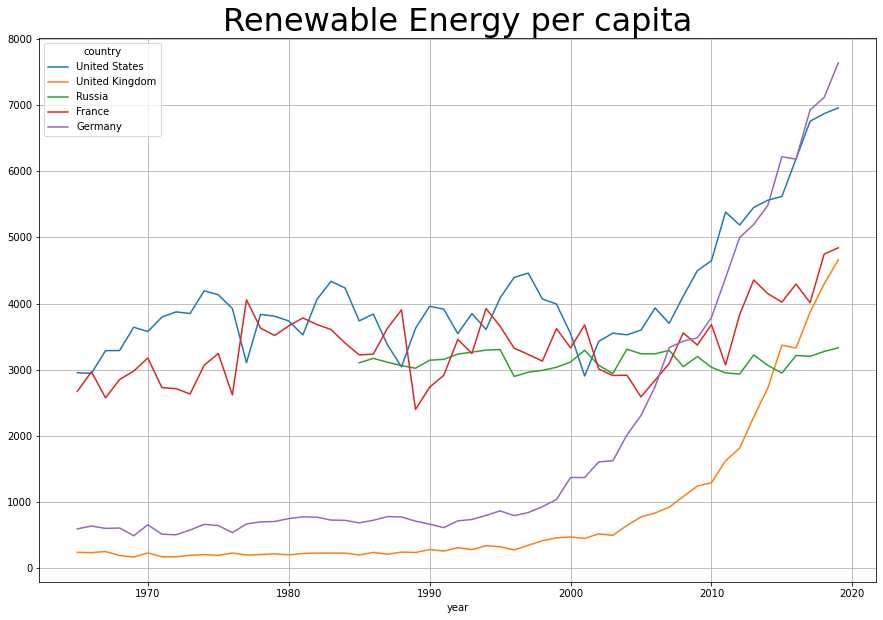

In [116]:
energy_pivot[['United States','United Kingdom','Russia', 'France','Germany']].plot(figsize=(15,10))
plt.grid()
plt.title("Renewable Energy per capita",fontsize=32)

## Discussion:

### Coal consumption in general is on a declining trend, which is great to see. However, US is still the highest consumer of Coal per capita. 

### Most countries have increased renewable source consumption per capita except for Russia. This might be due to Russia being an Oil producing nation. Its dependency on oil is much higher as a result. 

### The renewable energy consumption in nearly all the countries has been on the rise since the 2000s. With Germany having the highest uptake in renewable energy